In [1]:
import numpy as np
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
plt.style.use('ggplot')



******************************
context imported. Front of path:
/Users/sean/repos/numeric_2022
back of path: /Users/sean/.ipython
******************************

through /Users/sean/repos/numeric_2022/notebooks/lab6/context.py


### Problem Experiment

In [2]:
sigma = 10.0
b = 8/3
rho_crit = 470/19


In [3]:
class Integ61(Integrator):
   
    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars)
        
    def set_yinit(self,initvars,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
            timevars = namedtuple('timevars', self.config['timevars'].keys())
            self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)
    
    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f

In [4]:
def plot_3d(ax,xvals,vals,zvals):
    """
        plot a 3-d trajectory with start and stop markers
    """
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.set_xlim((-20, 20))
    ax.set_ylim((-30, 30))
    ax.set_zlim((5, 55))
    ax.grid(True)
    #
    # look down from 30 degree elevation and an azimuth of
    #
    ax.view_init(30,5)
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.plot([-20,15],[-30,-30],[0,0],'k-')
    ax.scatter(xvals[0],yvals[0],zvals[0],marker='o',c='green',s=75)
    ax.scatter(xvals[-1],yvals[-1],zvals[-1],marker='^',c='blue',s=75)
    out=ax.set(xlabel='x',ylabel='y',zlabel='z')
    line.set(alpha=0.2)
    return ax

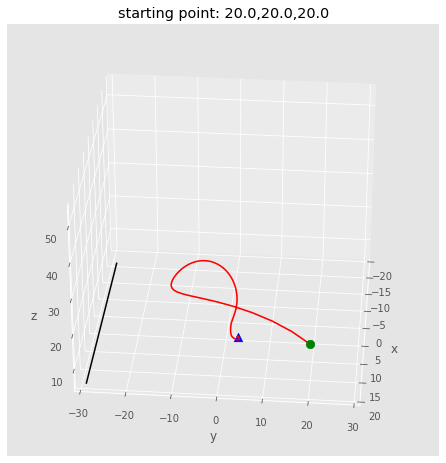

In [5]:
#
# make a nested dictionary to hold parameters
#
timevars=dict(tstart=0,tend=100,dt=0.01)
uservars=dict(sigma=10,beta=2.6666,rho=3)
initvars=dict(x=20,y=20,z=20)
params=dict(timevars=timevars,uservars=uservars,initvars=initvars)
#
# expand the params dictionary into key,value pairs for
# the Integ61 constructor using dictionary expansion
#
theSolver = Integ61('lorenz.yaml',**params)
timevals, coords, errorlist = theSolver.timeloop5fixed()
xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]


fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax=plot_3d(ax,xvals,yvals,zvals)
out=ax.set(title='starting point: {},{},{}'.format(*coords[0,:]))
#help(ax.view_init)

In [6]:
print(f'Final coordinates are: x = {coords[-1,0]}, y = {coords[-1,1]}, z = {coords[-1,2]}')

Final coordinates are: x = 2.3093722090646205, y = 2.3093722090646227, z = 2.0


In [7]:
print(f'Final coordinates are: x = {coords[-1,0]}, y = {coords[-1,1]}, z = {coords[-1,2]}')

Final coordinates are: x = 2.3093722090646205, y = 2.3093722090646227, z = 2.0


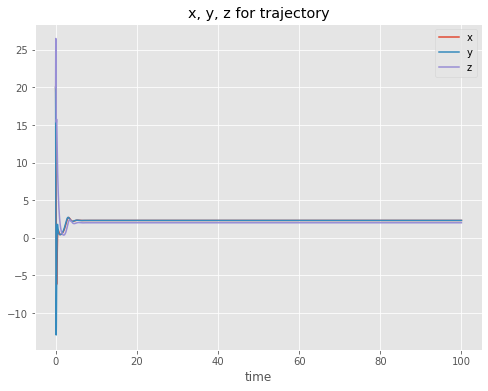

In [8]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(timevals,xvals,label='x')
ax.plot(timevals,yvals,label='y')
ax.plot(timevals,zvals,label='z')
ax.set(title='x, y, z for trajectory',xlabel='time')
out=ax.legend()


#### Question 1

A $\rho$ value below 23 shows stability while any $\rho \geq 24$ is unstable. Figure fixed-plot uses $\rho = 28$ and shows instability. We can see that all x,y and z oscillate around values. In comparison, $\rho \leq 23$ has decaying oscillations and becomes stable.

#### Question 2

Changing the initial location does change where the solution ends up. Initial conditions of $(5,5,5)$ have final solutions: $x ~ -12.6, y ~ -6.8, z ~ 37.9$. Initial conditions of $(20,20,20)$ have final solutions: $x ~ -4.9, y ~ -8.1, z ~ 14.6$.

#### Question 3

$\rho$ is a control parameter representing the temperatue difference between the top and bottom of the tank. If the temperature difference is too large, the particles behave more chaotically than with a smaller temperature difference. This is why there is a critical value $\rho^*$. Above this critical value, the temperature difference is too large and the particles cannot be captured properly by the model.  
Initial placement changing the ending result makes sense, because we would not expect particles in different parts of the tank to end up in the same place. This would break conservation of mass.

### Problem Eigenvalues

$det(A-\lambda I) = 0$ gives:
$$(-\sigma - \lambda)\left[(-1-\lambda)(-\beta - \lambda)\right] - \sigma \left[\rho(-\beta - \lambda)\right] = 0$$
We can see that satisfying $ \beta + \lambda = 0$ will gives us a root. Therefore the first root is $\lambda = -\beta$. To solve the rest we divide the first equation by $ (-\beta - \lambda)$ giving:
$$(-\sigma - \lambda)(-1 - \lambda) - \sigma\rho = 0$$
Which expands to:
$$\lambda^2 + \lambda(1+ \sigma) + \sigma(1-\rho) = 0$$
So our roots, using the quadratic formula, are:
$$\lambda_1,\lambda_2 = -(1+\sigma) \pm \sqrt{(1+\sigma)^2 - 4\sigma(1-\rho)}$$
By expanding the equation inside the square root, we can see that this is the same as the roots given in the problem text.

### Problem Stability

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


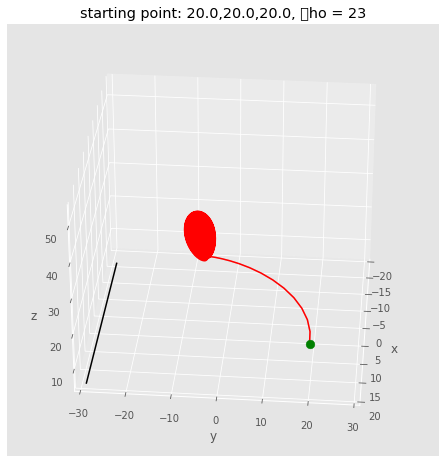

In [15]:
#
# make a nested dictionary to hold parameters
#
timevars=dict(tstart=0,tend=100,dt=0.01)
uservars=dict(sigma=10,beta=2.6666,rho=23)
initvars=dict(x=20,y=20,z=20)
params=dict(timevars=timevars,uservars=uservars,initvars=initvars)
#
# expand the params dictionary into key,value pairs for
# the Integ61 constructor using dictionary expansion
#
theSolver = Integ61('lorenz.yaml',**params)
timevals, coords, errorlist = theSolver.timeloop5fixed()
xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]


fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax=plot_3d(ax,xvals,yvals,zvals)
out=ax.set(title='starting point: {},{},{}'.format(*coords[0,:]))
#help(ax.view_init)

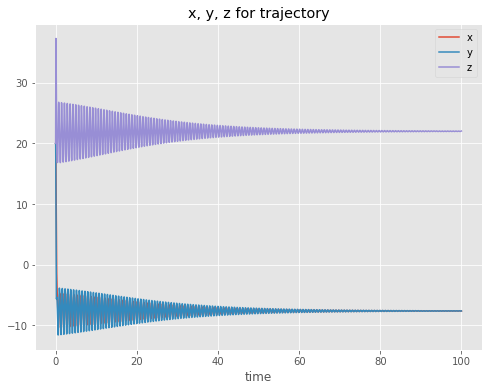

In [16]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(timevals,xvals,label='x')
ax.plot(timevals,yvals,label='y')
ax.plot(timevals,zvals,label='z')
ax.set(title='x, y, z for trajectory',xlabel='time')
out=ax.legend()

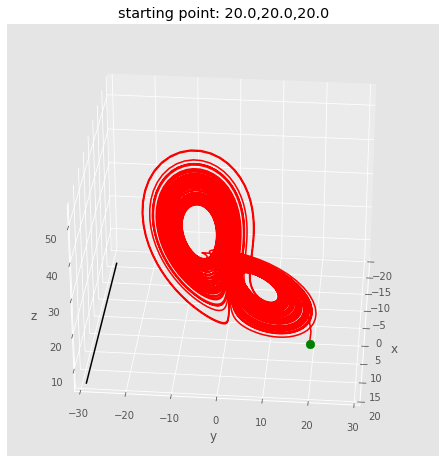

In [18]:
#
# make a nested dictionary to hold parameters
#
timevars=dict(tstart=0,tend=100,dt=0.01)
uservars=dict(sigma=10,beta=2.6666,rho=24)
initvars=dict(x=20,y=20,z=20)
params=dict(timevars=timevars,uservars=uservars,initvars=initvars)
#
# expand the params dictionary into key,value pairs for
# the Integ61 constructor using dictionary expansion
#
theSolver = Integ61('lorenz.yaml',**params)
timevals, coords, errorlist = theSolver.timeloop5fixed()
xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]


fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax=plot_3d(ax,xvals,yvals,zvals)
out=ax.set(title='starting point: {},{},{}'.format(*coords[0,:]))
#help(ax.view_init)

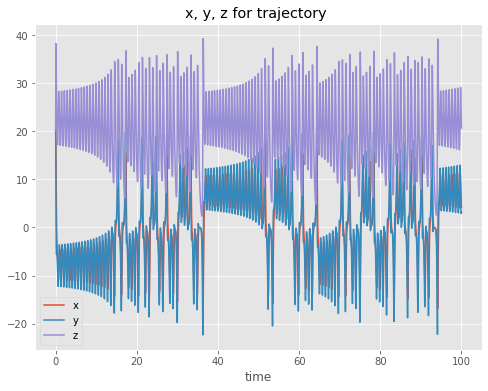

In [19]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(timevals,xvals,label='x')
ax.plot(timevals,yvals,label='y')
ax.plot(timevals,zvals,label='z')
ax.set(title='x, y, z for trajectory ',xlabel='time')
out=ax.legend()

The x,y,z plot for $\rho = 23$ shows stability through a decaying oscillation. In problem experiment we see very few oscillations when $\rho = 3$. However when $\rho = 24$ we see marginally stability through growing and decaying oscillations. The oscillations never fully decay or blow up which is what makes this solutions marginally stable.